In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
iris= datasets.load_iris()
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
iris= datasets.load_iris()
y = iris.target
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
print(df.isna().sum())

df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
#print(df.describe())
x = df[['sepal_area', 'petal_area']]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
models = []
#models.append(('LR', LogisticRegression(solver='bilinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.961818 (0.046851)
SVM: 0.924545 (0.055603)


In [ ]:
#model = SVC(gamma='auto')
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

print(accuracy_score(ytest, predictions))
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

0.9777777777777777
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
import pandas as pd

class pipeline:
  def __init__(self, iris):
    self.iris= iris
    y = iris.target
    df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
    print(df.isna().sum())

    df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
    df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
    #print(df.describe())
    x = df[['sepal_area', 'petal_area']]

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

    models = []
    #models.append(('LR', LogisticRegression(solver='bilinear', multi_class='ovr')))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC(gamma='auto')))

    results = []
    names = []

    for name, model in models:
      kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
      cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

    #model = SVC(gamma='auto')
    model = KNeighborsClassifier()
    model.fit(xtrain, ytrain)
    predictions = model.predict(xtest)

    print(accuracy_score(ytest, predictions))
    cm = confusion_matrix(ytest, predictions)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    
    plt.show()
    #print(confusion_matrix(ytest, predictions))
    print(classification_report(ytest, predictions))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
KNN: 0.961818 (0.046851)
SVM: 0.924545 (0.055603)
0.9777777777777777


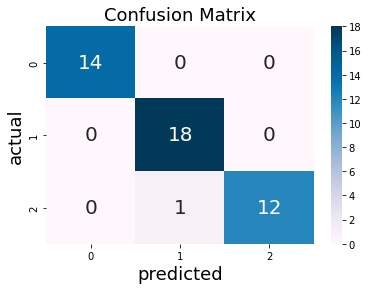

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
iris= datasets.load_iris()
pipeline(iris)